# XGBoost

XGBoost (eXtreme Gradient Boosting), est un algorithme de boosting conçu pour être efficace avec des données volumineuses et complexes. XGBoost est en effet une implémentation avancée de l'algorithme de gradient boosting. Il se distingue par sa rapidité d'exécution grâce à des optimisations algorithmiques telles que la parallélisation et la réduction du surapprentissage, ainsi que sa capacité à gérer des données manquantes de manière intuitive. De plus, XGBoost propose une régularisation intégrée, ce qui le rend plus robuste et moins susceptible de surajuster les données d'apprentissage.

Les premières étapes de XGBoost sont similaires à celles du gradient boosting, notamment l'initialisation du modèle avec une prédiction visant à minimiser la fonction de coût, ainsi que le calcul des résidus, qui correspondent aux gradients de la fonction de coût. Il repose sur la même méthode d'ensemble pour la création de modèles qui prédisent les erreurs à chaque itération, et ces erreurs résiduelles sont utilisées pour ajuster les modèles faibles successifs dans le but d'obtenir une prédiction précise de la variable cible.

Cependant, XGBoost apporte des fonctionnalités nouvelles et avancées au gradient boosting. Pour mieux comprendre ces améliorations, nous expliquerons en détail les étapes de son fonctionnement.

Commençons à expliquer comment XGBoost construit l'arbre. Chaque arbre commence avec une seule feuille qui contient toutes les erreurs.


Puis, l'algorithme calcul un score de similarité, qui, pour notre cas de classification, vaut : 
\begin{equation*}
\text{Score de Similarité} = \frac{(\sum_{i=1}^{n}\text{erreurs})^2}{\sum_{i=1}^{n}(\text{probabilité prédite précédemment})(1 - \text{probabilité prédite précédemment}) + \lambda}
\end{equation*}
avec $\lambda$ un paramètre de régularisation.  Elle vise à réduire la sensibilité de la prédiction aux observations individuelles. Lorsque $\lambda$ >0, les scores de similarité sont plus faibles.

Maintenant, l'algorithme quantifie dans quelle mesure les noeuds fils regroupent des résidus similaires mieux que la racine. Pour cela, on calcul le gain donné par :
\begin{equation*}
\text{Gain} = \text{Similarité_noeud_gauche} + \text{Similarité_noeud_droite} - \text{Similarité_noeud_racine}
\end{equation*}

Ainsi, l'algorithme teste toutes les seuils possibles pour chaque variable numérique, et les catégories de toutes les variables catégorielles, et choisie celle qui maximise le Gain.
Quand il y a qu'un  seul résidu dans une feuille, l'algorithme ne peut pas continuer à la diviser. En fin de compte, cela ne devrait pas dépasser 6 niveaux.

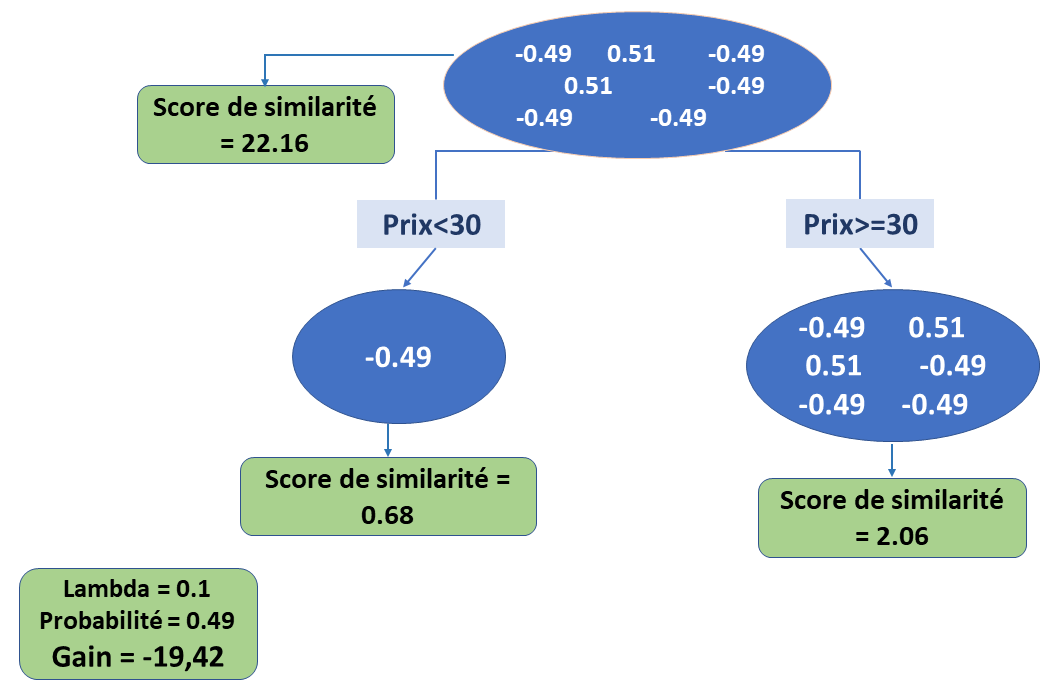

In [3]:
from IPython.display import Image
image_path = "/home/jovyan/github intro/ss.png"
width = 500
height = 500
Image(filename=image_path, width=width, height=height)

Une terminologie spécifique à XGBoost: Couverture. Elle détermine le nombre minimum de résidus dans chaque feuille:
\begin{equation*}
\text{Couverture} = \sum_{i=1}^{n}(\text{probabilité prédite précédemment})(1 - \text{probabilité prédite précédemment})
\end{equation*}
Elle est paramétrisée par $min\_child\_weight$. Si la Couverture  est plus petite que la couverture que nous avons définie dans $min\_child\_weight$, la feuille sera retirée.

Ensuite, XGBoost élague l'arbre. L'élagage est désigné par le paramètre $\gamma$. Le Gain est comparé à $\gamma$:

$\begin{cases}
\text{Gain} - \gamma > 0 : \text{Diviser le nœud.} \\
\text{Gain} - \gamma < 0 : \text{Élaguer l'arbre.}
\end{cases}$


Dans l'exemple qu'on a, le gain est déjà négatif. Donc pour toute valeur de $\gamma$, on aura une différence négative et la division n'aura pas lieu. L'algorithme testera tous les autres seuils et variables.

De même que Gradient boosting, %et contrairement à la forêt aléatoire et à l'arbre de décision, 
le résultat final dans le noeud terminal n'est pas déterminé par un vote majoritaire, mais par la formule suivante qui est la même que celle calculée en Gradient Boosting mais en ajoutant le paramètre de régulatisation $\lambda$:%, qui s'applique à notre cas de classification :

\begin{equation*}
\small
\text{valeur_nœud_terminal} = \frac{\sum_{i=1}^{n}\text{erreurs}}{\sum_{i=1}^{n}(\text{probabilité prédite précédemment})(1 - \text{probabilité prédite précédemment}) + \textbf{$\lambda$}}
\end{equation*}

Maintenant que les étapes de construction de l'arbre sont terminés, les étapes qui suivent de la mise à jour des log(odds), la probabilité prédite, le calcul des erreurs et la construction de plusieurs prédicteurs pour les ajuster afin de prédire la classe sont les même que Gradient Boosting.

$\log(odds)\_nouveau$ = $\log(odds)$ de la prédiction précédente + Learning rate $\times$ valeur du noeud terminal fournie par l'arbre.

# Hyperparamètres du modèle

| Hyperparamètre                  | Description                                           |
|-------------------------------- |-------------------------------------------------------|
| `n_estimators`                  | Le nombre d'estimateurs (arbres) dans l'ensemble.     |
| `eta`                           | Taux d'apprentissage auquel les erreurs sont corrigées (lrarning_rate). |
| `max_depth`                     | La profondeur maximale des arbres de décision.       |
| `min_child_weight`              | Le poids minimum nécessaire pour créer un nouvel nœud dans l'arbre. C'est la couverture expliquée ci-dessus. |
| `subsample`                     | La fraction d'échantillons à utiliser pour l'apprentissage de chaque arbre. |
| `colsample_bytree`              | La fraction de variables à utiliser pour la construction de chaque arbre. |
| `gamma`                         | Paramètre de régularisation qui contrôle l'ampleur de la réduction des feuilles. (valeur à enlever du gain) |
| `reg_lambda`                        | Paramètre de régularisation L2 (Ridge).              |
| `alpha`                         | Paramètre de régularisation L1 (Lasso).              |
| `objective`                     | La fonction objective à optimiser (par exemple, 'reg:squarederror' pour la régression ou 'binary:logistic' pour la classification binaire). |
| `eval_metric`                   | La métrique d'évaluation à utiliser pour l'arrêt anticipé (par exemple, 'rmse' pour la régression ou 'logloss' pour la classification). |
| `early_stopping_rounds`         | Nombre d'itérations sans amélioration pour l'arrêt anticipé. |
| `tree_method`                   | La méthode de construction des arbres (par exemple, 'auto', 'exact', 'approx', 'hist'). |
| `nthread`                       | Nombre de threads à utiliser pour l'apprentissage parallèle. (comme n_jobs)|
